In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['agg.path.chunksize'] = 10000

In [2]:
array = np.load('/home/calum/Documents/Mphys_data/match_catalogs/sdss_neighbours.npy')

In [3]:
array.shape

(589966, 7)

In [4]:
def plot_hist(array,bin_num):
    weights = np.ones_like(array)/len(array)
    n, bins, patches = plt.hist(array,bins=bin_num,weights=weights)
    plt.close()
    return bins, n

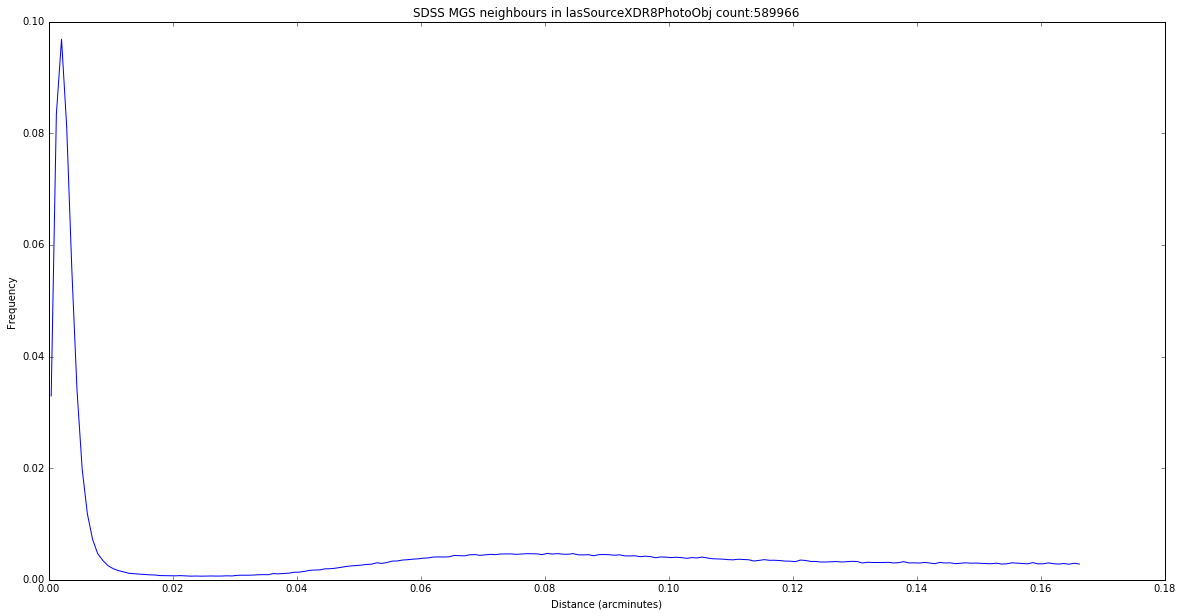

In [5]:
bins, n = plot_hist([row[1] for row in array],200)

step = 0.5*(bins[1]-bins[0])

plt.figure(figsize=(20,10))
plt.plot(bins[:-1]+step, n)
plt.xlabel('Distance (arcminutes)')
plt.ylabel('Frequency')
title_str= 'SDSS MGS neighbours in lasSourceXDR8PhotoObj count:'+str(len(array))
plt.title(title_str)
plt.savefig('sdss_mgs_neighbours.png')

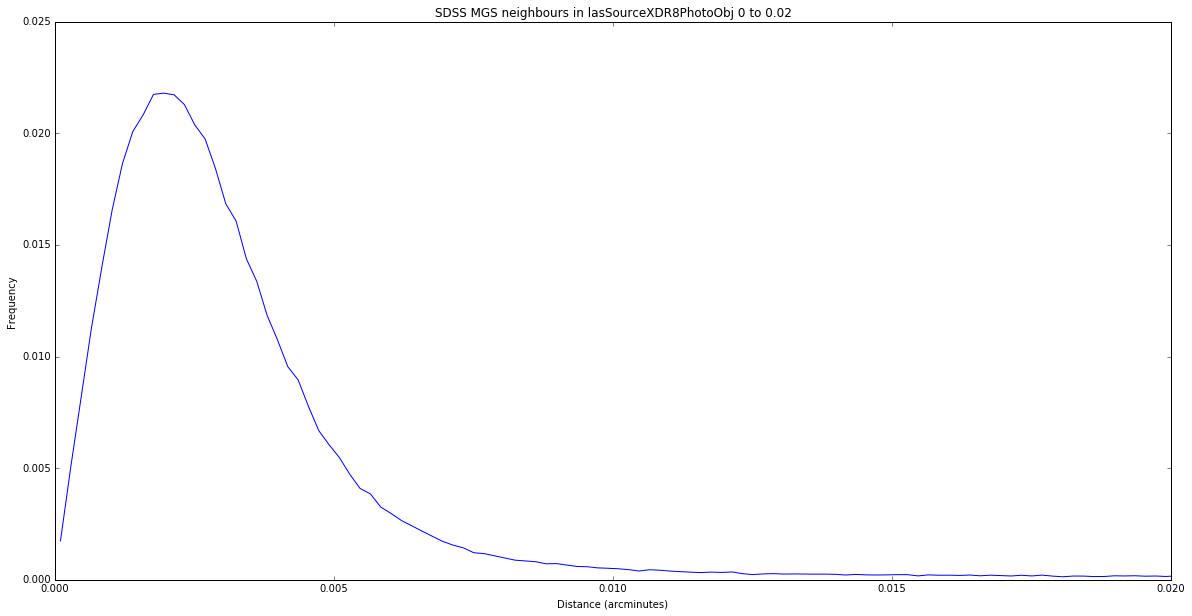

In [6]:
bins, n = plot_hist([row[1] for row in array],900)

step = 0.5*(bins[1]-bins[0])

plt.figure(figsize=(20,10))
plt.plot(bins[:-1]+step, n)
plt.xlim(0,0.02)
plt.xlabel('Distance (arcminutes)')
plt.ylabel('Frequency')
plt.title('SDSS MGS neighbours in lasSourceXDR8PhotoObj 0 to 0.02')
plt.savefig('sdss_mgs_neighbours_reduced_range.png')

In [7]:
matched_array = np.load('/home/calum/Documents/Mphys_data/match_catalogs/sdss_match.npy')
larger_matched_array = np.load('/home/calum/Documents/Mphys_data/match_catalogs/sdss_match_01.npy')

matched_array.shape, larger_matched_array.shape

((144725, 7), (161883, 7))

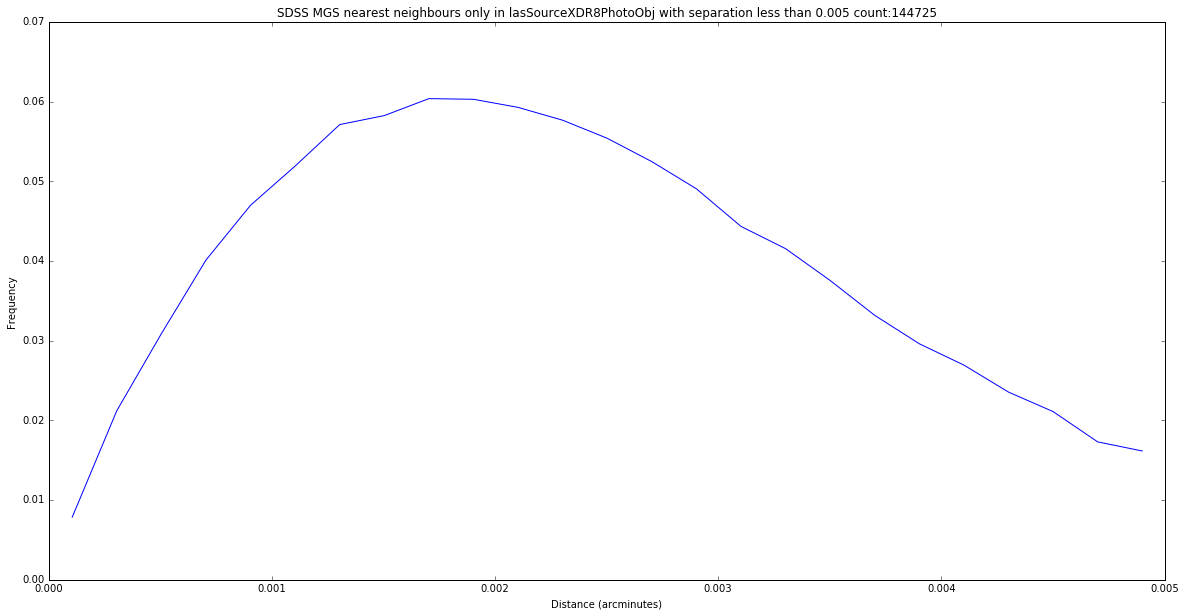

In [8]:
bins, n = plot_hist([row[1] for row in matched_array],25)

step = 0.5*(bins[1]-bins[0])

plt.figure(figsize=(20,10))
plt.plot(bins[:-1]+step, n)
plt.xlabel('Distance (arcminutes)')
plt.ylabel('Frequency')
title_str= 'SDSS MGS nearest neighbours only in lasSourceXDR8PhotoObj with separation less than 0.005 count:'+str(len(matched_array))
plt.title(title_str)
plt.savefig('sdss_mgs_n_neighbours.png')

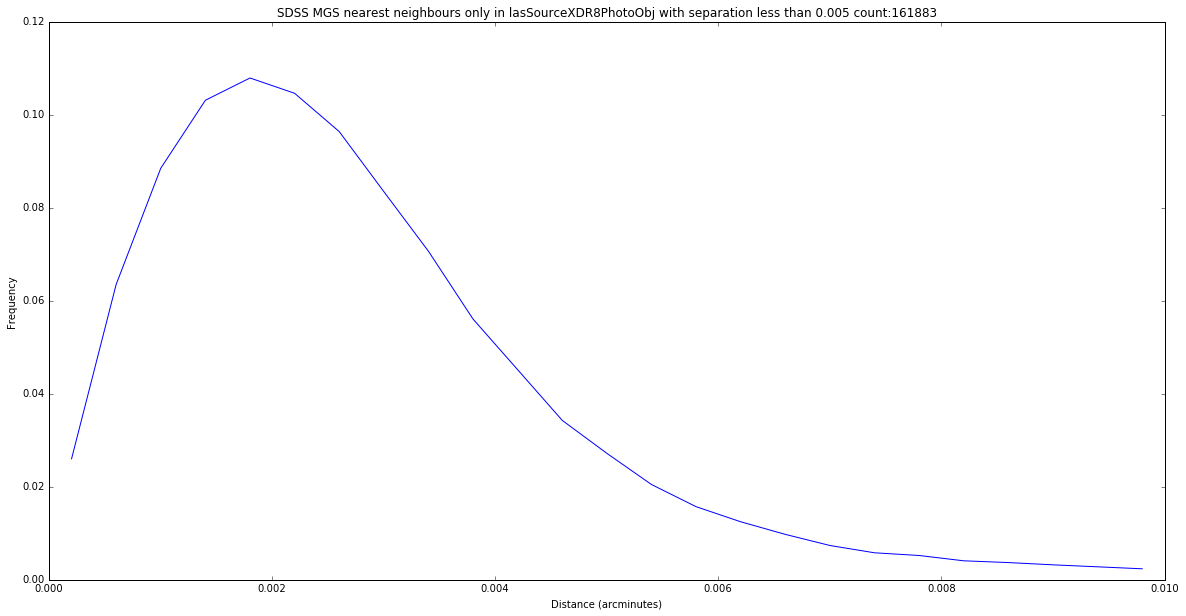

In [9]:
bins, n = plot_hist([row[1] for row in larger_matched_array],25)

step = 0.5*(bins[1]-bins[0])

plt.figure(figsize=(20,10))
plt.plot(bins[:-1]+step, n)
plt.xlabel('Distance (arcminutes)')
plt.ylabel('Frequency')
title_str= 'SDSS MGS nearest neighbours only in lasSourceXDR8PhotoObj with separation less than 0.005 count:'+str(len(larger_matched_array))
plt.title(title_str)
plt.savefig('sdss_mgs_n_neighbours.png')

In [10]:
link_array = np.load('/home/calum/Documents/Mphys_data/match_catalogs/check_my_links.npy')
link_array.shape

(502677, 4)

In [11]:
mgs_array = np.load('/home/calum/Documents/Mphys_data/match_catalogs/mgs_contour_tbl.npy')
mgs_array.shape

(580316, 4)

In [19]:
galex_array = np.load('/home/calum/Documents/Mphys_data/match_catalogs/galex_neighbours.npy')
galex_array.shape

(182053, 6)

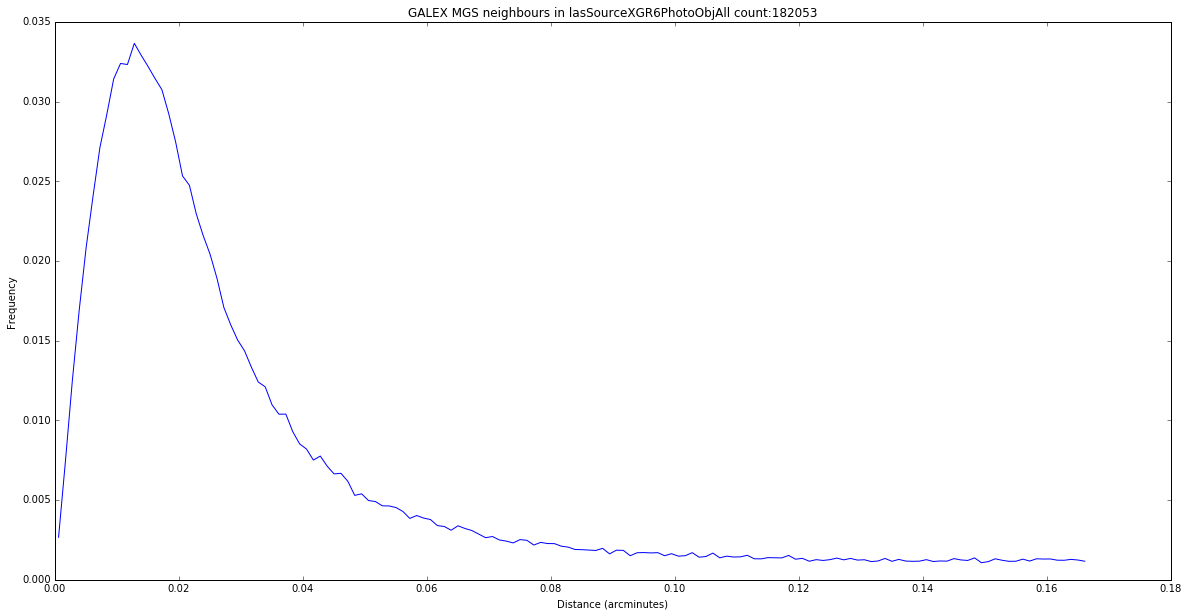

In [20]:
bins, n = plot_hist([row[1] for row in galex_array],150)

step = 0.5*(bins[1]-bins[0])

plt.figure(figsize=(20,10))
plt.plot(bins[:-1]+step, n)
plt.xlabel('Distance (arcminutes)')
plt.ylabel('Frequency')
title_str= 'GALEX MGS neighbours in lasSourceXGR6PhotoObjAll count:'+str(len(galex_array))
plt.title(title_str)
plt.savefig('galex_mgs_neighbours.png')

In [14]:
wise_array = np.load('/home/calum/Documents/Mphys_data/match_catalogs/wise_neighbours.npy')
wise_array.shape

(149901, 6)

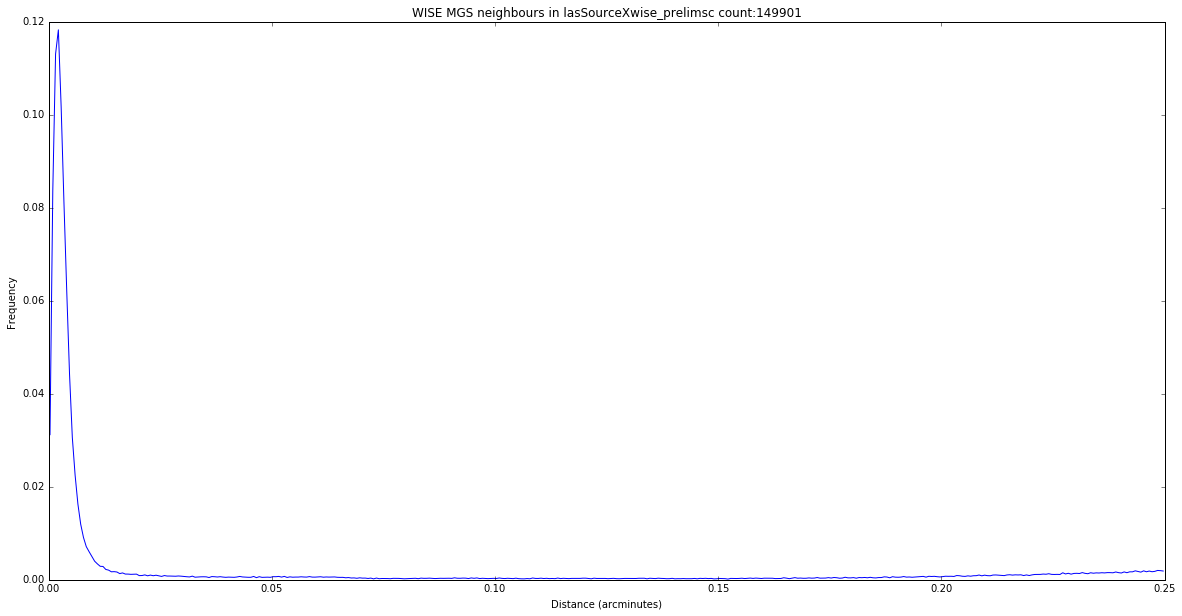

In [15]:
bins, n = plot_hist([row[1] for row in wise_array],400)

step = 0.5*(bins[1]-bins[0])

plt.figure(figsize=(20,10))
plt.plot(bins[:-1]+step, n)
plt.xlabel('Distance (arcminutes)')
plt.ylabel('Frequency')
title_str= 'WISE MGS neighbours in lasSourceXwise_prelimsc count:'+str(len(wise_array))
plt.title(title_str)
plt.savefig('wise_mgs_neighbours.png')

(0, 0.02)

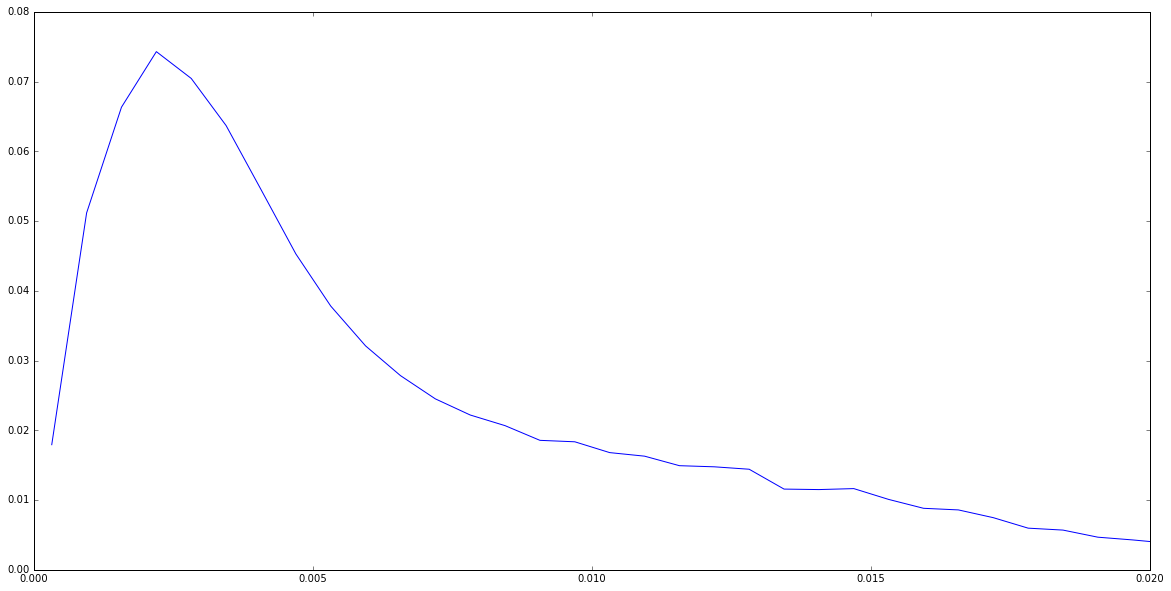

In [42]:
bins, n = plot_hist([row[1] for row in wise_array],400)

step = 0.5*(bins[1]-bins[0])

plt.figure(figsize=(20,10))
plt.plot(bins[:-1]+step, n)
plt.xlim(0,0.02)

In [24]:
mgs_array = np.load('/home/calum/Documents/Mphys_data/match_catalogs/mgs_contour_tbl.npy')
mgs_array.shape

(580316, 4)

In [21]:
array = np.load('/home/calum/Documents/Mphys_data/match_catalogs/dust_extinction_dust2.npy')
array.shape

(1714064, 6)

In [25]:
x = np.array([row[4] for row in array if row[2] < 0.08 and row[2]>0.07])
y = np.array([row[5] for row in array if row[2] < 0.08 and row[2]>0.07])
len(x),len(y)

(149580, 149580)

In [16]:
def plot_contour(x_contour,y_contour, n_bins,cmap):            
    # now let's overplot some contours. First we have to make a 2d
    # histogram of the point distribution.
    vals, xedges, yedges = np.histogram2d(x_contour, y_contour, bins=n_bins)
       
    # Now we have the bin edges, but we want to find the bin centres to
    # plot the contour positions - they're half way between the edges:
    xbins = 0.5 * (xedges[:-1] + xedges[1:])
    ybins = 0.5 * (yedges[:-1] + yedges[1:])
    
    # now plot the contours
    plt.contourf(xbins, ybins, -vals.T, 20, zorder=10, cmap=cmap)
    plt.xlabel('RA')
    plt.ylabel('DEC')
    title_str = 'Cosmic web'
    plt.title(title_str)
    plt.colorbar()

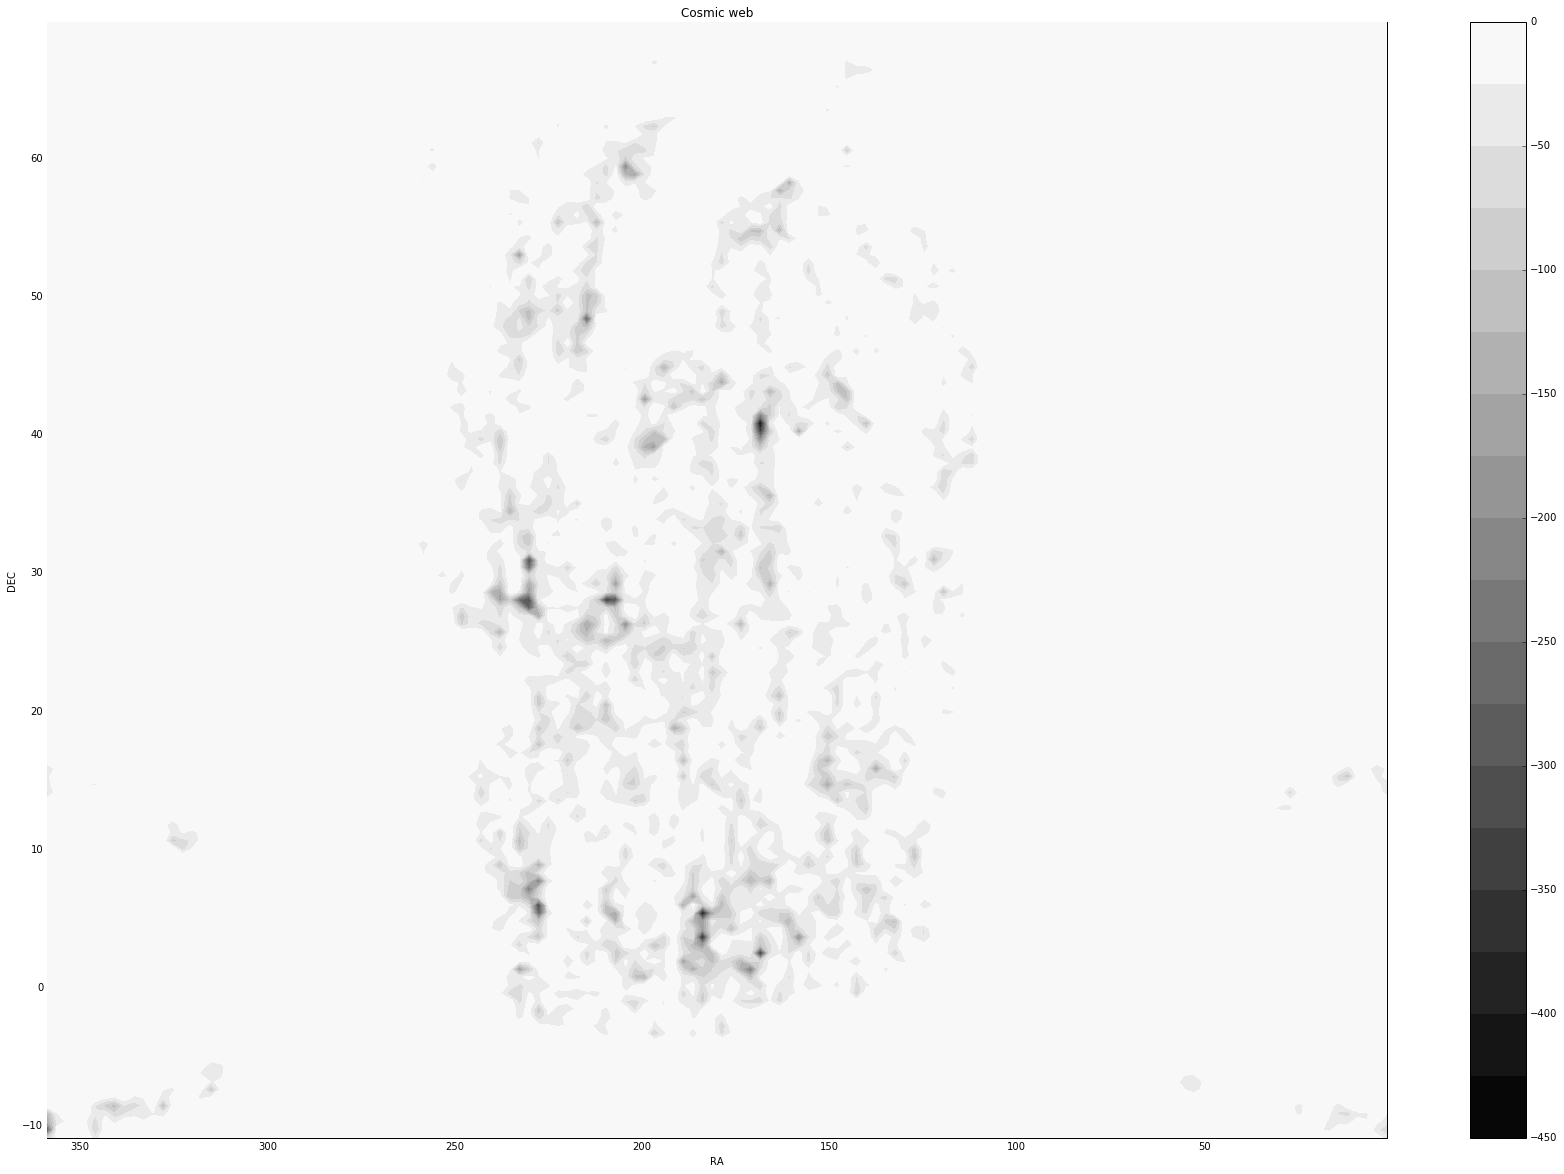

In [34]:
plt.figure(figsize=(30,20))
plot_contour(x,y,140,'gray')
plt.gca().invert_xaxis()

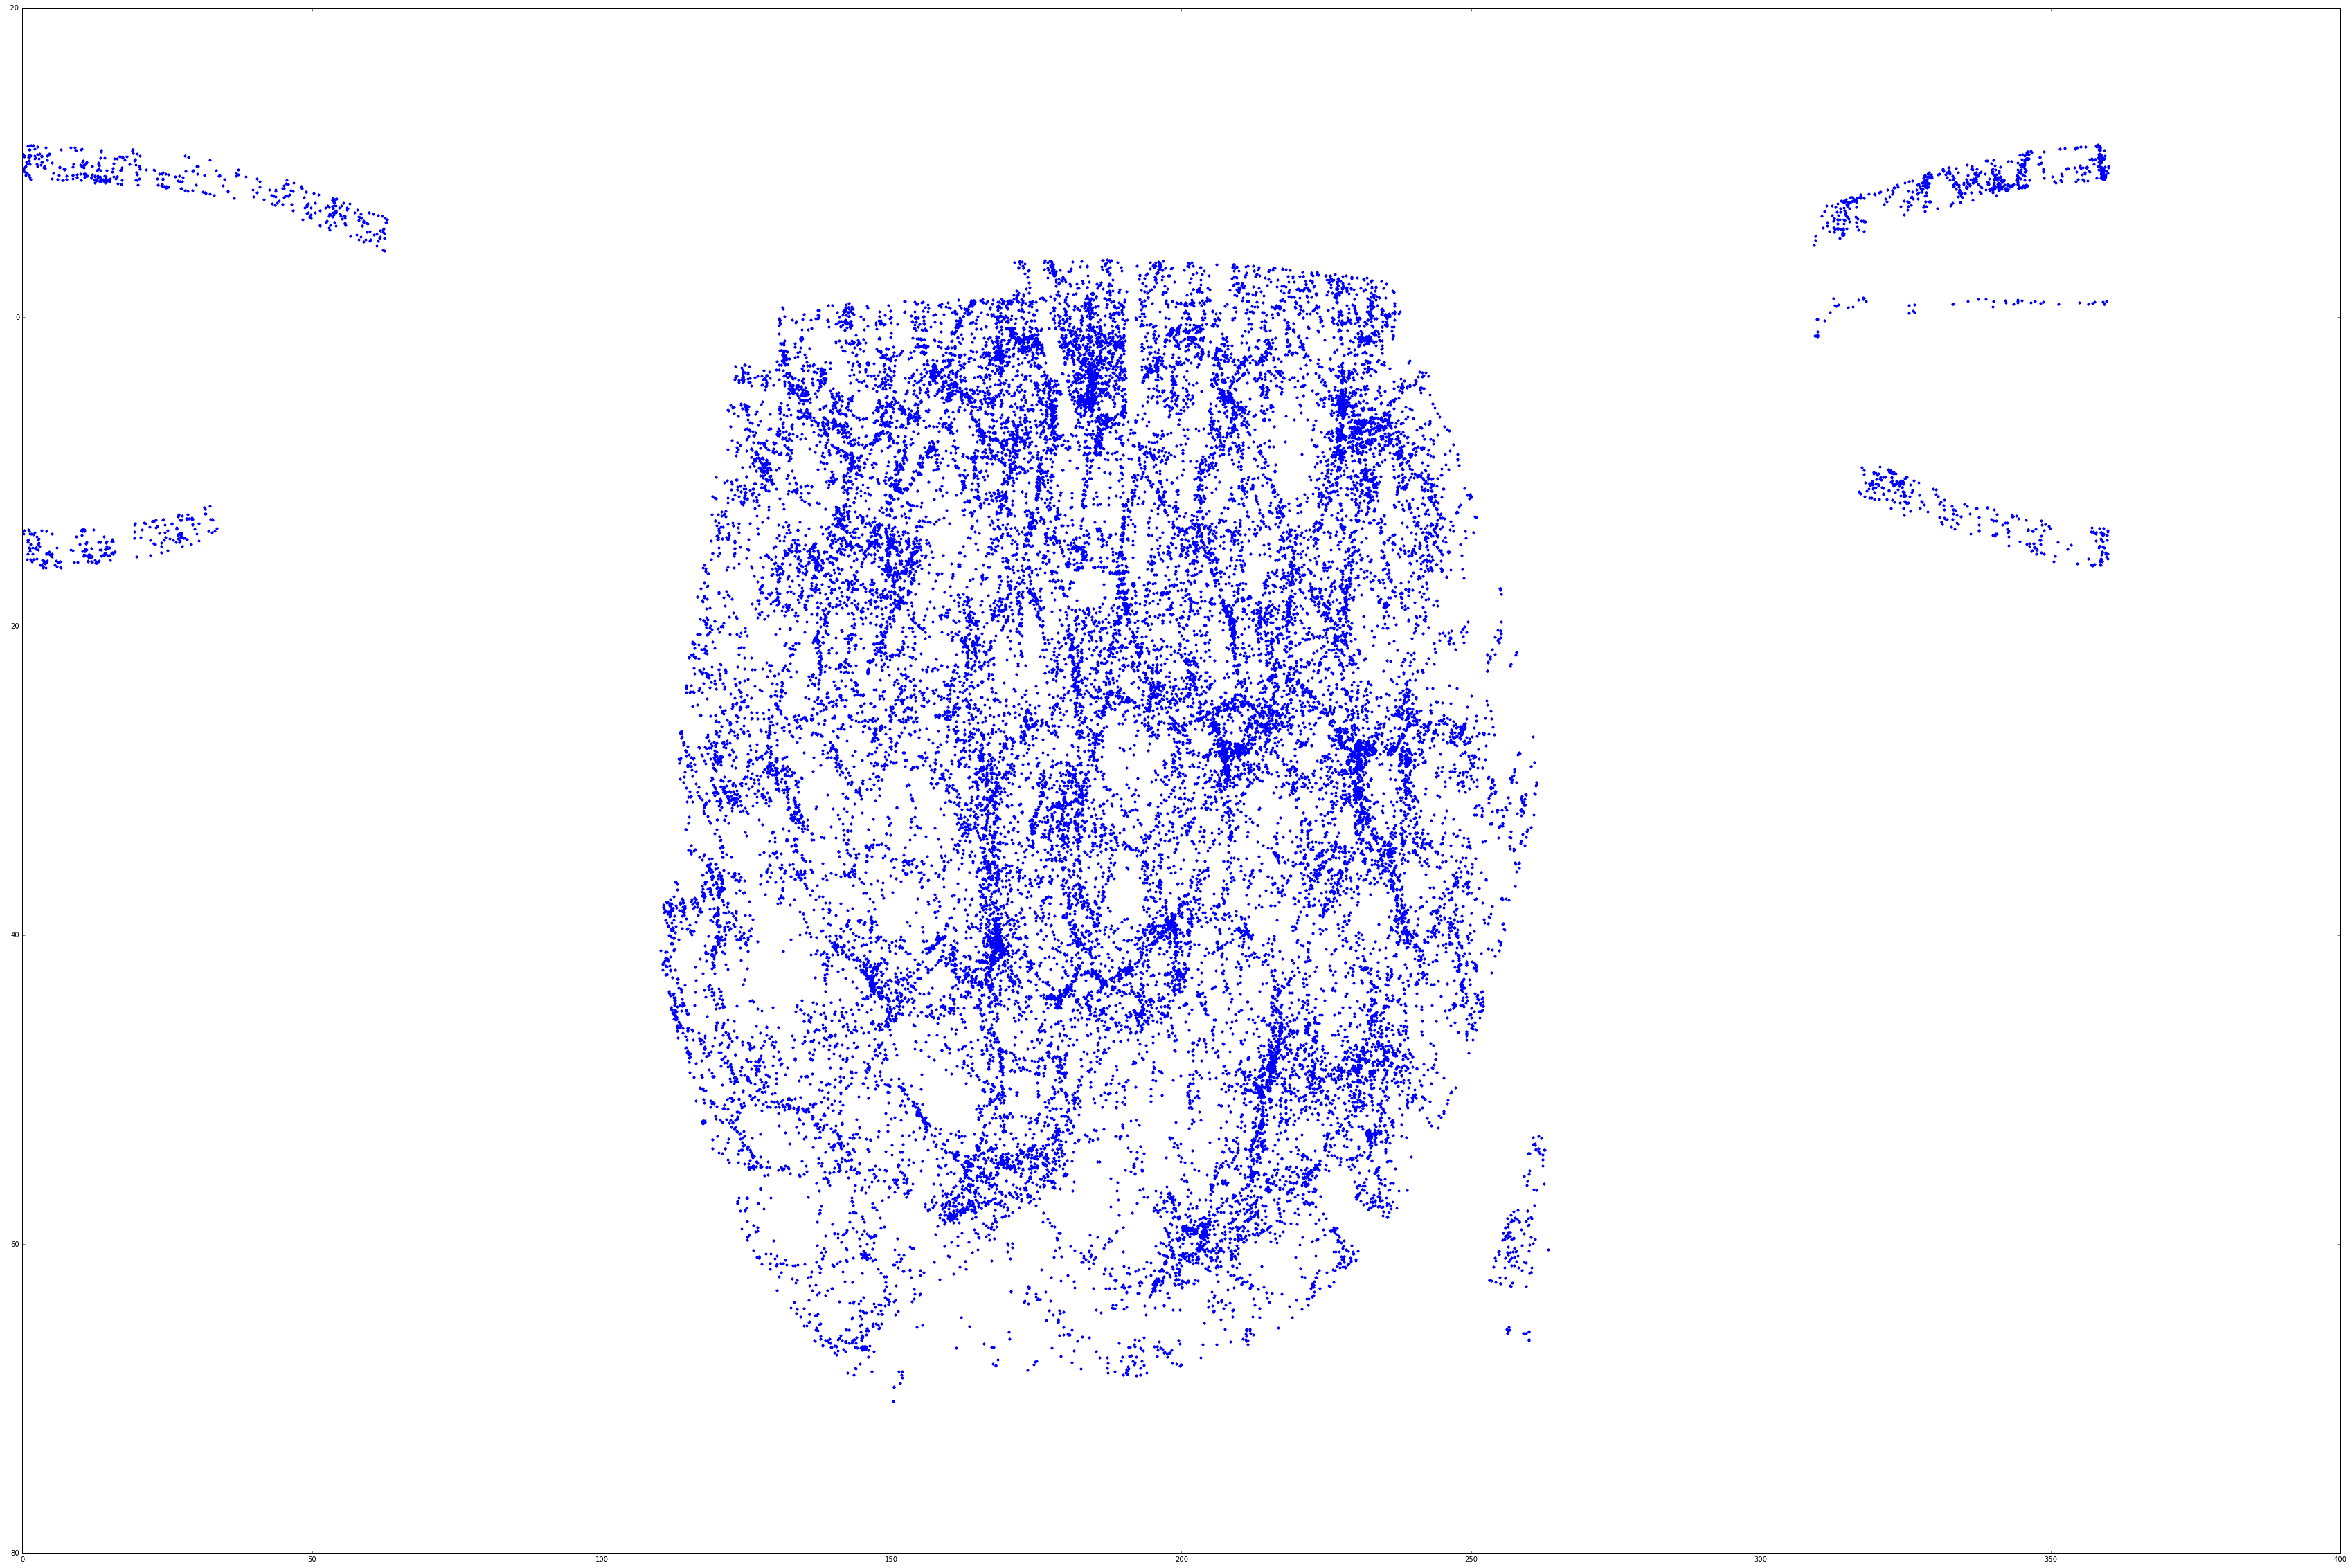

In [31]:
plt.figure(figsize=(60,40))
plt.plot(x,y,'.')
plt.gca().invert_yaxis()
plt.savefig('cosmic_web.png')

(268321, 7)


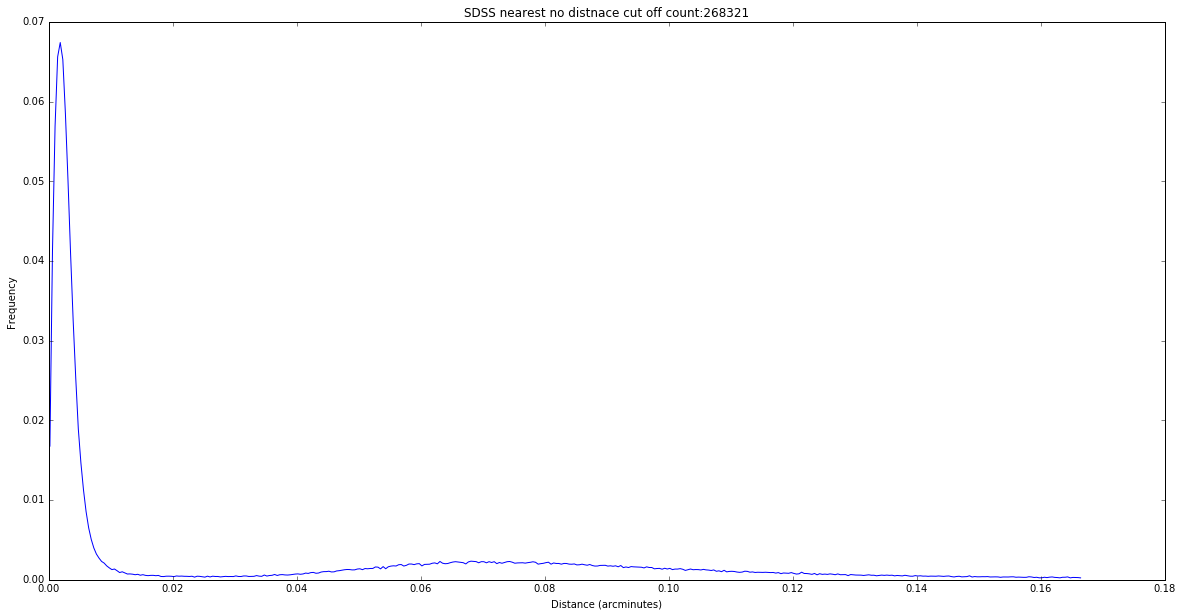

In [21]:
sdss_all_array = np.load('/home/calum/Documents/Mphys_data/match_catalogs/sdss_all_match.npy')
print(sdss_all_array.shape)

bins, n = plot_hist([row[1] for row in sdss_all_array],400)

step = 0.5*(bins[1]-bins[0])

plt.figure(figsize=(20,10))
plt.plot(bins[:-1]+step, n)
plt.xlabel('Distance (arcminutes)')
plt.ylabel('Frequency')
title_str= 'SDSS nearest no distnace cut off count:'+str(len(sdss_all_array))
plt.title(title_str)
plt.savefig('wise_mgs_neighbours.png')